In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

In [2]:
# загружаем датасет
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston = pd.read_csv('data/housing.csv', delimiter=r"\s+", names=column_names)
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
boston.shape

(506, 14)

In [4]:
A = np.column_stack((np.ones(boston.shape[0]), boston['CRIM'], boston['RM']))
y = boston[['PRICE']]
print(A)

[[1.0000e+00 6.3200e-03 6.5750e+00]
 [1.0000e+00 2.7310e-02 6.4210e+00]
 [1.0000e+00 2.7290e-02 7.1850e+00]
 ...
 [1.0000e+00 6.0760e-02 6.9760e+00]
 [1.0000e+00 1.0959e-01 6.7940e+00]
 [1.0000e+00 4.7410e-02 6.0300e+00]]


In [5]:
w = np.linalg.inv(A.T@A)@A.T@y
print(w.values)

[[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]


In [6]:
# добавились новые данные:
CRIM_new = 0.1
RM_new = 8
# делаем прогноз типичной стоимости дома
PRICE_new = w.iloc[0]+w.iloc[1]*CRIM_new+w.iloc[2]*RM_new
print(PRICE_new.values)

[37.85733519]


In [7]:
# короткий способ сделать прогноз
new=np.array([[1,CRIM_new,RM_new]])
print('prediction:', (new@w).values)

prediction: [[37.85733519]]


In [8]:
from sklearn.linear_model import LinearRegression
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
new_prediction = model.predict(new)
print('prediction:', new_prediction)

w_hat: [[-29.24471945  -0.26491325   8.39106825]]
prediction: [[37.85733519]]


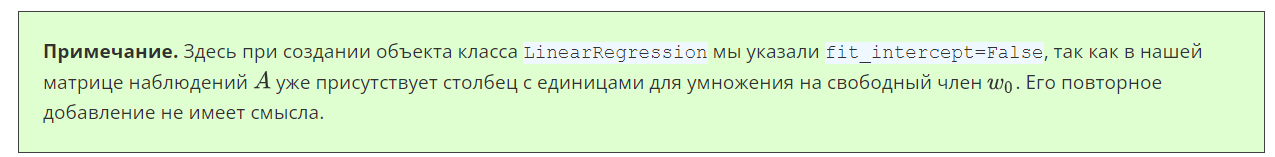

In [9]:
# короткий способ сделать прогноз
CRIM_new_2 = 0.2
RM_new_2 = 6
new_2=np.array([[1,CRIM_new_2,RM_new_2]])
print('prediction:', (new_2@w).values)

prediction: [[21.04870738]]


In [10]:
# создадим вырожденную матрицу А
A = np.array([
    [1, 1, 1, 1], 
    [2, 1, 1, 2], 
    [-2, -1, -1, -2]]
).T
y = np.array([1, 2, 5, 1])
# вычислим OLS-оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 

LinAlgError: Singular matrix

In [11]:
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)

w_hat: [ 6.   -1.25  1.25]


На самом деле сингулярное разложение зашито в функцию np.linalg.lstsq(), которая позволяет в одну строку построить модель линейной регрессии по МНК:

In [12]:
# классическая OLS-регрессия в numpy с возможностью получения решения даже для вырожденных матриц
np.linalg.lstsq(A, y, rcond=None)

(array([ 6.  , -1.25,  1.25]),
 array([], dtype=float64),
 2,
 array([4.86435029e+00, 5.81460412e-01, 3.42443768e-17]))

In [13]:
boston[['CHAS', 'LSTAT', 'CRIM','RM']].describe()

,CHAS,LSTAT,CRIM,RM
count,506.000000,506.000000,506.000000,506.000000
mean,0.069170,12.653063,3.613524,6.284634
std,0.253994,7.141062,8.601545,0.702617
min,0.000000,1.730000,0.006320,3.561000
25%,0.000000,6.950000,0.082045,5.885500
50%,0.000000,11.360000,0.256510,6.208500
75%,0.000000,16.955000,3.677083,6.623500
max,1.000000,37.970000,88.976200,8.780000


In [14]:
# составляем матрицу наблюдений и вектор целевой переменной
A = np.column_stack((np.ones(506), boston[['CHAS', 'LSTAT', 'CRIM','RM']]))
y = boston[['PRICE']]
# вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(np.round(w_hat.values, 2))

[[-1.92]
 [ 4.  ]
 [-0.58]
 [-0.1 ]
 [ 5.08]]


In [15]:
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = boston[['CHAS', 'LSTAT', 'CRIM','RM']]
y = boston[['PRICE']]
# стандартизируем векторы в столбцах матрицы A
A_cent = A - A.mean()
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

,CHAS,LSTAT,CRIM,RM
count,506.00,506.00,506.00,506.00
mean,-0.00,-0.00,-0.00,-0.00
std,0.04,0.04,0.04,0.04
min,-0.01,-0.07,-0.02,-0.17
25%,-0.01,-0.04,-0.02,-0.03
50%,-0.01,-0.01,-0.02,-0.00
75%,-0.01,0.03,0.00,0.02
max,0.16,0.16,0.44,0.16


In [16]:
# длина каждого стандартизированного вектора равна 1
print(np.linalg.norm(A_st, axis=0))

[1. 1. 1. 1.]


In [17]:
# стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

In [18]:
# вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
print(w_hat_st.values)

[[ 0.11039956]
 [-0.45220423]
 [-0.09108766]
 [ 0.38774848]]


In [19]:
# матрица Грама
A_st.T @ A_st

,CHAS,LSTAT,CRIM,RM
CHAS,1.000000,-0.053929,-0.055892,0.091251
LSTAT,-0.053929,1.000000,0.455621,-0.613808
CRIM,-0.055892,0.455621,1.000000,-0.219247
RM,0.091251,-0.613808,-0.219247,1.000000


In [20]:
q = np.array([12, 8]).T
q_cent = q - q.mean()
q_st = q_cent/np.linalg.norm(q_cent)
q_st.round(3)

array([ 0.707, -0.707])

In [21]:
x_1 = np.array([1, 2, 6])
x_2 = np.array([3000, 1000, 2000])
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.18898224],
       [-0.18898224,  1.        ]])

In [22]:
n1 = np.array([5,1,2]).T
n2 = np.array([4,2,8]).T
print(np.corrcoef(n1, n2).round(2))

[[1.   0.05]
 [0.05 1.  ]]


In [23]:
x1 = np.array([5.1, 1.8, 2.1, 10.3, 12.1, 12.6])
x2 = np.array([10.2, 3.7, 4.1, 20.5, 24.2, 24.1])
x3 = np.array([2.5, 0.9, 1.1, 5.1, 6.1, 6.3])
C = np.corrcoef([x1, x2, x3])
print(C)
print(np.linalg.matrix_rank(C))
print(round(np.linalg.det(C), 7))

[[1.         0.99925473 0.99983661]
 [0.99925473 1.         0.99906626]
 [0.99983661 0.99906626 1.        ]]
3
5e-07


In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
X = boston[['LSTAT', 'CRIM', 'PTRATIO','RM']]
y = boston[['PRICE']]
def polynomial_regression(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=True)
    X_poly = poly.fit_transform(X)
    w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y
    y_pred = X_poly @ w_hat
    return X_poly, y_pred, w_hat

In [31]:
A_poly, y_pred, w_hat = polynomial_regression(X, y, 1)
A_poly2, y_pred2, w_hat2 = polynomial_regression(X, y, 2)
A_poly3, y_pred3, w_hat3 = polynomial_regression(X, y, 3)
A_poly4, y_pred4, w_hat4 = polynomial_regression(X, y, 4)
A_poly5, y_pred5, w_hat5 = polynomial_regression(X, y, 5)

In [32]:
from sklearn.metrics import mean_absolute_percentage_error
 
print('MAPE для полинома 1-й степени {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred)*100))
print('MAPE для полинома 2-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred2)*100))
print('MAPE для полинома 3-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred3)*100))
print('MAPE для полинома 4-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred4)*100))
print('MAPE для полинома 5-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred5)*100))

MAPE для полинома 1-й степени 18.20%
MAPE для полинома 2-й степени  13.41%
MAPE для полинома 3-й степени  12.93%
MAPE для полинома 4-й степени  10.74%
MAPE для полинома 5-й степени  84.62%


In [33]:
display(pd.DataFrame(w_hat5).describe())

,PRICE
count,126.000000
mean,1008.203924
std,27835.291702
min,-146675.565374
25%,-1.420498
50%,-0.000022
75%,0.794362
max,271949.900733


In [34]:
# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly5[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly5[:, 1:].shape[1])

Ранг корреляционной матрицы: 110
Количество факторов: 125


In [35]:
display(pd.DataFrame(w_hat4).describe())

,PRICE
count,70.000000
mean,-50.870583
std,887.128612
min,-6923.503323
25%,-0.187949
50%,-0.000779
75%,0.322229
max,2305.201169


In [36]:
def polynomial_regression_sk(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=False)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression().fit(X_poly, y)
    y_pred = lr.predict(X_poly)
    return X_poly, y_pred, lr.coef_

for k in range(1, 6):
    A_poly, y_pred, w_hat = polynomial_regression_sk(X, y, k)
    print(
        "MAPE для полинома степени {} — {:.2f}%, СКО — {:.0f}".format(
            k, mean_absolute_percentage_error(y, y_pred)*100, w_hat.std()
        )

    )

MAPE для полинома степени 1 — 18.20%, СКО — 2
MAPE для полинома степени 2 — 13.41%, СКО — 5
MAPE для полинома степени 3 — 12.93%, СКО — 9
MAPE для полинома степени 4 — 10.74%, СКО — 304
MAPE для полинома степени 5 — 9.02%, СКО — 17055


In [49]:
X_2 = np.array([[1, 1, 1, 1], [1, 3, -2, 9], [1, 9, 4, 81]]).T
y_2= np.array([3, 7, -5, 21])
w_hat_2 = np.linalg.inv(X_2.T@X_2)@X_2.T@y_2
print(np.round(w_hat_2, 1))

[ 0.1  2.5 -0. ]


In [50]:
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# единичная матрица
E = np.eye(3)
# коэффициент регуляризации 
alpha = 5
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
w_hat_ridge = np.linalg.inv(A.T@A+alpha*E)@A.T@y
print(w_hat_ridge) 

[0.6122449  0.29387755 0.5877551 ]


Давайте обучим модель для решения нашей последней задачи, а затем проверим коэффициенты регрессии. Так как мы заранее заложили в матрицу  столбец из единиц, то, чтобы получить корректное решение, параметр fit_intercept следует установить в значение False.

In [52]:
from sklearn.linear_model import Ridge

In [53]:
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
ridge = Ridge(alpha=5, fit_intercept=False)
ridge.fit(A, y)
print(ridge.coef_) 

[0.6122449  0.29387755 0.5877551 ]


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

In [56]:
# выделяем интересующие нас факторы
X = boston[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston[['PRICE']]
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=20, solver='svd')
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ridge, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))


MAPE на тренировочных фолдах: 12.54 %
MAPE на валидационных фолдах: 17.02 %


In [62]:
X_3 = np.array([[1,1,1,1,1], [5,9,4,3,5], [15,18,18,19,19], [7,6,7,7,7]]).T
y_3 = np.array([24,22,35,33,36])
alpha_2 = 1
E_2 = np.eye(4)
w_hat_ridge_2 = np.linalg.inv(X_3.T@X_3+alpha_2*E_2)@X_3.T@y_3
print(np.round(w_hat_ridge_2, 2))

[-0.09 -1.71  1.91  0.73]


In [63]:
from sklearn.linear_model import Lasso

In [64]:
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии с помощью L1-регуляризации
lasso = Lasso(alpha=0.1, fit_intercept=False)
lasso.fit(A, y)
print(lasso.coef_)

[1.14925373 0.         0.71921642]


In [65]:
# выделяем интересующие нас факторы
X = boston[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston[['PRICE']]

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)

# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=0.1, max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

MAPE на тренировочных фолдах: 12.44 %
MAPE на валидационных фолдах: 16.44 %


In [66]:
from sklearn.linear_model import ElasticNet

In [67]:
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии 
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.2, fit_intercept=False)
elasticnet.fit(A, y)
print(elasticnet.coef_)

[1.13492457 0.19525842 0.6237965 ]


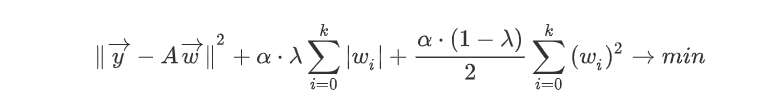

In [68]:
elasticnet_2 = ElasticNet(alpha=0.1, l1_ratio=0.7, fit_intercept=False)
elasticnet_2.fit(A, y)
print(elasticnet_2.coef_)

[1.14379753 0.         0.71993025]


In [69]:
elasticnet_3 = ElasticNet(alpha=0.1, l1_ratio=1, fit_intercept=False)
elasticnet_3.fit(A, y)
print(elasticnet_3.coef_)

[1.14925373 0.         0.71921642]


In [70]:
# выделяем интересующие нас факторы
X = boston[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston[['PRICE']]
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# создаём модель линейной регрессии c L1- и L2-регуляризациями
lasso = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100)) 

MAPE на тренировочных фолдах: 12.65 %
MAPE на валидационных фолдах: 15.70 %
